<a href="https://colab.research.google.com/github/sathishsara1/iMobilithon/blob/main/Mobilothon_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv('/content/separated_reviews_with_sentiment_ratings.csv')
data.head()

,S.No,Brand,Model,Review,Rating
0,1,Maruti Suzuki,Alto,"""Perfect city car! Getting 22 kmpl in city. Ea...",3
1,1,Maruti Suzuki,Alto,Using Alto K10 for 2 years. Best for small fam...,4
2,1,Maruti Suzuki,Alto,First-time car buyer - very satisfied. Great m...,5
3,1,Maruti Suzuki,Alto,The new Alto has improved safety features but ...,3
4,1,Maruti Suzuki,Alto,Alto K10 automatic is perfect for city traffic...,5


In [ ]:
pd.unique(data['Rating'])

array([3, 4, 5, 2])

<Axes: xlabel='Rating', ylabel='count'>

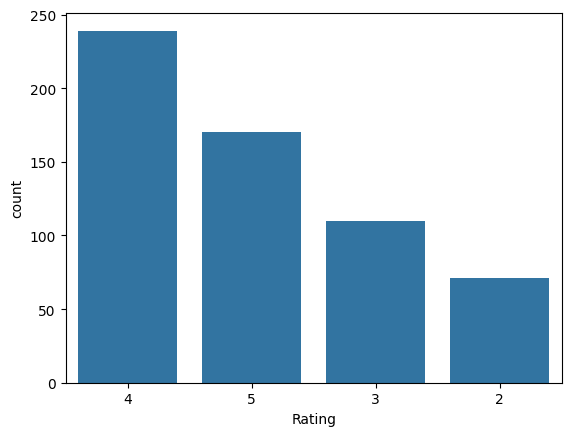

In [ ]:
sns.countplot(data=data,
              x='Rating',
              order=data.Rating.value_counts().index)

In [ ]:
# rating label(final)
pos_neg = []
for i in range(len(data['Rating'])):
    if data['Rating'][i] >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['label'] = pos_neg

In [ ]:

nltk.download('punkt')
nltk.download('punkt_tab')
from tqdm import tqdm

def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        # Removing punctuations
        sentence = re.sub(r'[^\w\s]', '', sentence)

        # Converting lowercase and removing stopwords
        preprocessed_text.append(' '.join(token.lower()
                                        for token in nltk.word_tokenize(sentence)
                                        if token.lower() not in stopwords.words('english')))

    return preprocessed_text

preprocessed_review = preprocess_text(data['Review'].values)
data['Review'] = preprocessed_review

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
100%|██████████| 590/590 [00:00<00:00, 942.10it/s]


In [ ]:
data.head()

,S.No,Brand,Model,Review,Rating,label
0,1,Maruti Suzuki,Alto,perfect city car getting 22 kmpl city easy par...,3,0
1,1,Maruti Suzuki,Alto,using alto k10 2 years best small family good ...,4,0
2,1,Maruti Suzuki,Alto,firsttime car buyer satisfied great mileage ma...,5,1
3,1,Maruti Suzuki,Alto,new alto improved safety features still feels ...,3,0
4,1,Maruti Suzuki,Alto,alto k10 automatic perfect city traffic light ...,5,1


In [ ]:
data["label"].value_counts()

,count
label,
0,420
1,170


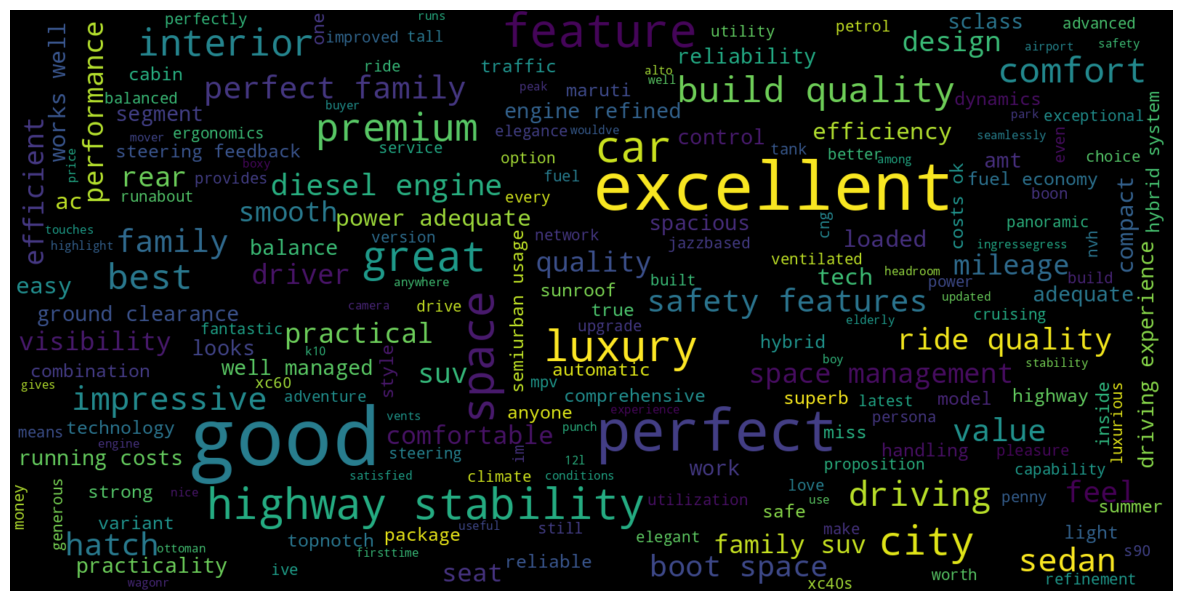

In [ ]:
consolidated = ' '.join(
    word for word in data['Review'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review'] ).toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Model training, Evaluation, and Prediction
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
                                                    test_size=0.33,
                                                    stratify=data['label'],
                                                    random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

#testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train,pred))



1.0


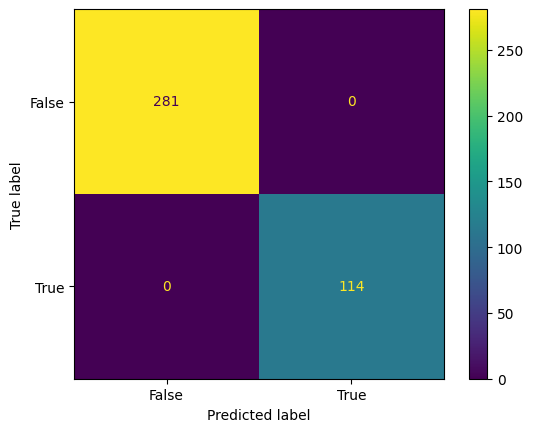

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()




In [ ]:
data = pd.read_csv('/content/separated_reviews_with_sentiment_ratings.csv')
data.head()

,S.No,Brand,Model,Review,Rating
0,1,Maruti Suzuki,Alto,"""Perfect city car! Getting 22 kmpl in city. Ea...",3
1,1,Maruti Suzuki,Alto,Using Alto K10 for 2 years. Best for small fam...,4
2,1,Maruti Suzuki,Alto,First-time car buyer - very satisfied. Great m...,5
3,1,Maruti Suzuki,Alto,The new Alto has improved safety features but ...,3
4,1,Maruti Suzuki,Alto,Alto K10 automatic is perfect for city traffic...,5


In [ ]:
# Calculate the average rating for each model
avg_ratings = data.groupby('Model')['Rating'].mean().reset_index() # Changed df to data

# Rename columns for clarity
avg_ratings.rename(columns={'Rating': 'Average Rating'}, inplace=True)
avg_ratings.sort_values(by='Average Rating', ascending=False, inplace=True)

avg_ratings

,Model,Average Rating
27,Invicto,4.4
32,New Santro,4.4
49,Urban Cruiser,4.3
42,Seltos,4.2
13,E-Class,4.2
2,Amaze,4.2
57,XC90,4.2
46,Taigun,4.2
55,XC40,4.2
28,Jazz,4.2


from matplotlib import pyplot as plt
avg_ratings['Average Rating'].plot(kind='hist', bins=20, title='Average Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
avg_ratings['Average Rating'].plot(kind='line', figsize=(8, 4), title='Average Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Calculate the average rating for each brand
brand_avg_ratings = data.groupby('Brand')['Rating'].mean().reset_index()

# Rename columns for clarity
brand_avg_ratings.rename(columns={'Rating': 'Average Rating'}, inplace=True)
brand_avg_ratings.sort_values(by='Average Rating', ascending=False, inplace=True)

brand_avg_ratings


,Brand,Average Rating
11,Volvo,4.150
9,Toyota,3.950
1,Honda,3.920
3,KIA,3.900
5,Maruti Suzuki,3.900
6,Mercedes-Benz,3.900
0,Ford,3.825
2,Hyundai,3.800
10,Volkswagen,3.760
8,Tata,3.725


In [ ]:
import pandas as pd

# Load the CSV file to examine its structure and review the data
file_path = '/content/Sales Comparison.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
data.head()


,Brand,Model,Year,Sales
0,Maruti Suzuki,Alto,2019,192400
1,Maruti Suzuki,Alto,2020,161300
2,Maruti Suzuki,Alto,2021,208800
3,Maruti Suzuki,Alto,2022,203100
4,Maruti Suzuki,Alto,2023,189600


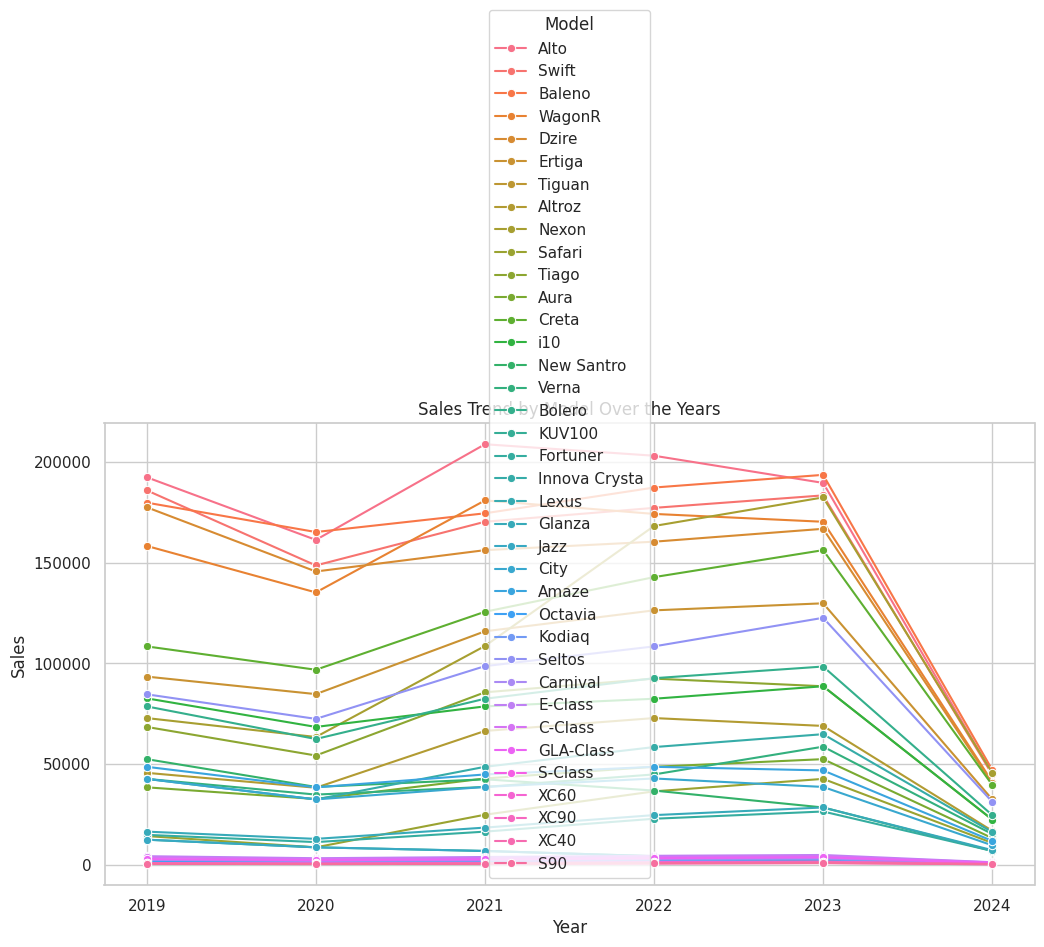

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')

# Plot the sales trends for each model over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='Sales', hue='Model', marker='o')
plt.title('Sales Trend by Model Over the Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Model')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare to forecast sales for each model individually
models = data['Model'].unique()
forecast_years = np.array([2024, 2025, 2026,2027]).reshape(-1, 1)
predictions = {}

# Perform linear regression for each car model to forecast future sales
for model in models:
    model_data = data[data['Model'] == model]

    # Reshape the year and sales data for the regression model
    X = model_data['Year'].values.reshape(-1, 1)
    y = model_data['Sales'].values

    # Fit the linear regression model
    reg = LinearRegression()
    reg.fit(X, y)

    # Predict sales for the forecast years (2024, 2025, 2026)
    predicted_sales = reg.predict(forecast_years)
    predictions[model] = predicted_sales

# Convert predictions to a DataFrame for easier viewing
forecast_df = pd.DataFrame(predictions, index=forecast_years.flatten())
forecast_df.index.name = 'Year'
forecast_df = forecast_df.round(0)
forecast_df


,Alto,Swift,Baleno,WagonR,Dzire,Ertiga,Tiguan,Altroz,Nexon,Safari,...,Seltos,Carnival,E-Class,C-Class,GLA-Class,S-Class,XC60,XC90,XC40,S90
Year,,,,,,,,,,,,,,,,,,,,,
2024,119819.0,109257.0,117524.0,108571.0,97081.0,85705.0,2048.0,48200.0,126876.0,29800.0,...,78686.0,1971.0,2914.0,2567.0,2214.0,924.0,924.0,500.0,729.0,500.0
2025,101053.0,92280.0,101367.0,94660.0,79447.0,81153.0,2233.0,46900.0,134893.0,32560.0,...,75640.0,1880.0,2640.0,2347.0,2080.0,947.0,947.0,520.0,760.0,520.0
2026,82288.0,75303.0,85210.0,80749.0,61812.0,76602.0,2419.0,45600.0,142910.0,35320.0,...,72594.0,1789.0,2366.0,2127.0,1946.0,970.0,970.0,540.0,791.0,540.0
2027,63522.0,58326.0,69052.0,66837.0,44178.0,72050.0,2605.0,44300.0,150928.0,38080.0,...,69549.0,1697.0,2091.0,1907.0,1811.0,992.0,992.0,560.0,823.0,560.0


In [ ]:
# Group the data by Brand and Year to aggregate sales for each brand per year
brand_data = data.groupby(['Brand', 'Year'])['Sales'].sum().reset_index()

# Get the unique brands in the dataset
brands = brand_data['Brand'].unique()

# Dictionary to store predictions for each brand
brand_predictions = {}

# Perform linear regression for each brand to forecast future sales
for brand in brands:
    brand_df = brand_data[brand_data['Brand'] == brand]

    # Prepare the data for the regression model
    X_brand = brand_df['Year'].values.reshape(-1, 1)
    y_brand = brand_df['Sales'].values

    # Fit the linear regression model
    reg_brand = LinearRegression()
    reg_brand.fit(X_brand, y_brand)

    # Predict sales for the years 2024, 2025, and 2026
    predicted_brand_sales = reg_brand.predict(forecast_years)
    brand_predictions[brand] = predicted_brand_sales

# Convert the predictions to a DataFrame for easier viewing
brand_forecast_df = pd.DataFrame(brand_predictions, index=forecast_years.flatten())
brand_forecast_df.index.name = 'Year'
brand_forecast_df = brand_forecast_df.round(0)
brand_forecast_df


,Honda,Hyundai,KIA,Mahindra,Maruti Suzuki,Mercedes-Benz,Skoda,Tata,Toyota,Volkswagen,Volvo
Year,,,,,,,,,,,
2024,53371.0,238429.0,80657.0,62990.0,637957.0,8619.0,3519.0,264905.0,79362.0,2048.0,2652.0
2025,42720.0,216440.0,77520.0,56493.0,549960.0,8013.0,3693.0,270953.0,79333.0,2233.0,2747.0
2026,32069.0,194451.0,74383.0,49996.0,461963.0,7408.0,3868.0,277002.0,79305.0,2419.0,2841.0
2027,21417.0,172463.0,71246.0,43499.0,373966.0,6802.0,4042.0,283050.0,79276.0,2605.0,2935.0


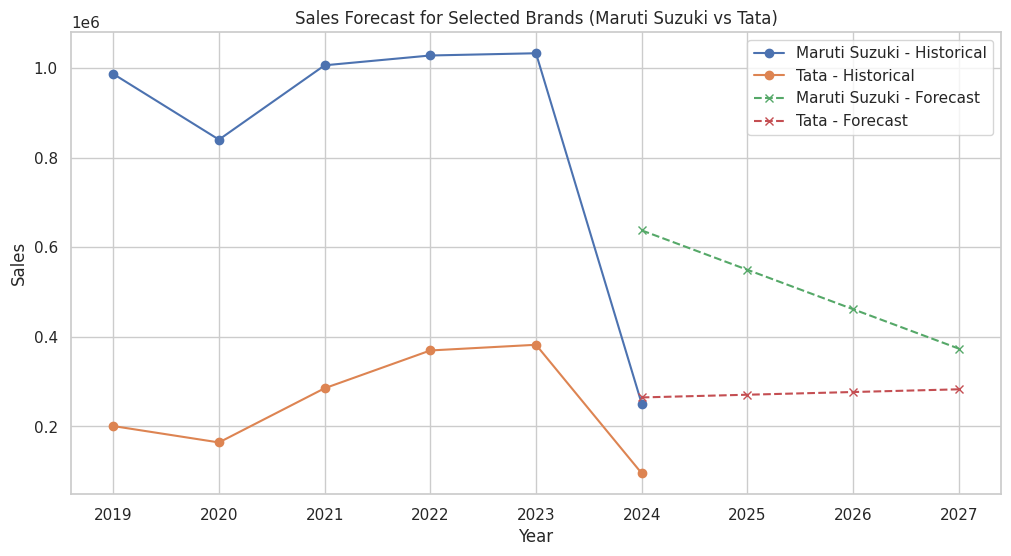

In [ ]:
# Select two brands for analysis
selected_brands = ['Maruti Suzuki', 'Tata']

# Prepare data for these selected brands
selected_brand_data = brand_data[brand_data['Brand'].isin(selected_brands)]

# Fit linear regression models and forecast sales for the chosen brands
brand_forecast = {}

for brand in selected_brands:
    brand_df = selected_brand_data[selected_brand_data['Brand'] == brand]
    X = brand_df['Year'].values.reshape(-1, 1)
    y = brand_df['Sales'].values

    reg = LinearRegression()
    reg.fit(X, y)

    # Predict sales for the next three years
    predicted_sales = reg.predict(forecast_years)
    brand_forecast[brand] = predicted_sales

# Plot the historical sales and forecasted sales for the selected brands
plt.figure(figsize=(12, 6))

# Plot historical data
for brand in selected_brands:
    brand_df = selected_brand_data[selected_brand_data['Brand'] == brand]
    plt.plot(brand_df['Year'], brand_df['Sales'], marker='o', label=f'{brand} - Historical')

# Plot forecasted data
for brand, sales in brand_forecast.items():
    plt.plot(forecast_years.flatten(), sales, marker='x', linestyle='--', label=f'{brand} - Forecast')

plt.title('Sales Forecast for Selected Brands (Maruti Suzuki vs Tata)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
